# Bank Note Authentication 

## Abstract:
    
Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.

## Data Set Information:
    
Data were extracted from images that were taken from genuine and forged banknote-like specimens. 
For digitization, an industrial camera usually used for print inspection was used. 

The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. 
Wavelet Transform tool were used to extract features from images.

Source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

## Attribute Information:
    
variance - variance of Wavelet Transformed image (continuous)

skewness - skewness of Wavelet Transformed image (continuous)

curtosis - curtosis of Wavelet Transformed image (continuous)

entropy - entropy of image (continuous)

class - class (integer)

## Import Libraries

In [22]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#reading the banknote dataset in a dataframe. 
columns = ["var","skewness","curtosis","entropy","class"]
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/00267/\
data_banknote_authentication.txt",index_col=False, names = columns)

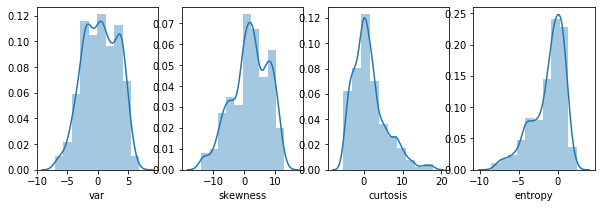

In [24]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(1, 4, figsize=(10,3))
vis1 = sns.distplot(df["var"],bins=10, ax= ax[0])
vis2 = sns.distplot(df["skewness"],bins=10, ax=ax[1])
vis3 = sns.distplot(df["curtosis"],bins=10, ax= ax[2])
vis4 = sns.distplot(df["entropy"],bins=10, ax=ax[3])
f.savefig('subplot.png')


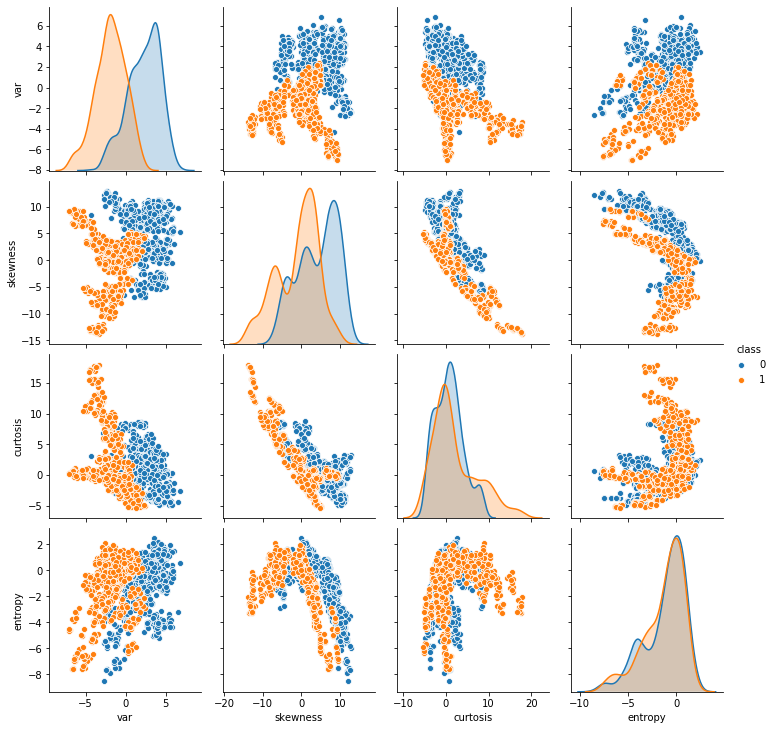

In [25]:
# now that we have a univariate distribution done, we can go ahead and determine the pairwise relationships in the dataset.
# we use the sns.pairplpot. Analyze the distrbutions.
# also, we add hue to see these distrbutions with the class col
sns.pairplot(df, hue="class")

## Split Data into Training and Test Set and Standardize

In [26]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [27]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [28]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

## Make Covariance Matrices and make Eigen Decomposition

Find the Eigen-values and the Eigen-vectors.

In [29]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevant covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00091241  0.26106526 -0.37965807  0.2855868 ]
 [ 0.26106526  1.00091241 -0.78600078 -0.52370267]
 [-0.37965807 -0.78600078  1.00091241  0.32384024]
 [ 0.2855868  -0.52370267  0.32384024  1.00091241]]
Eigenvectors 
[[-0.24410388 -0.75674709  0.60295351  0.06476264]
 [-0.63914113  0.0457533  -0.11988157 -0.75830974]
 [ 0.61378454  0.15345344  0.50421613 -0.58778114]
 [ 0.3939295  -0.63379217 -0.60649943 -0.27438198]]

Eigenvalues 
[2.17821749 1.30130064 0.34425337 0.17987814]


## Make a Plot of the Cumulative Variances due to the Eigen-values

In [30]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.40579687  86.90865691  95.50714586 100.        ]


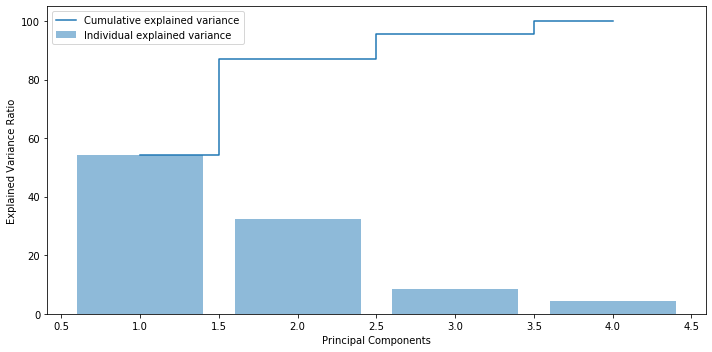

In [31]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## Find the Eigen-vectors corresponding to the Eigen-values

In [32]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(2.178217487681949,
  array([-0.24410388, -0.63914113,  0.61378454,  0.3939295 ])),
 (1.3013006373731932,
  array([-0.75674709,  0.0457533 ,  0.15345344, -0.63379217])),
 (0.34425337148288987,
  array([ 0.60295351, -0.11988157,  0.50421613, -0.60649943])),
 (0.17987813849846399,
  array([ 0.06476264, -0.75830974, -0.58778114, -0.27438198]))]

## Reduce Dimension by PCA

Reduce from 4 to 2 dimensional features.

In [33]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(4,1), 
                      eigen_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', w)


Matrix W:
 [[-0.24410388 -0.75674709]
 [-0.63914113  0.0457533 ]
 [ 0.61378454  0.15345344]
 [ 0.3939295  -0.63379217]]


## Reduce Dimension of the Data

In [ ]:
# Training data
X_train_sd_pca = X_train_sd.dot(w)

# Test data
X_test_sd_pca = X_test_sd.dot(w)

In [34]:
print('\n Original Data Dimension {}'.format(X_train_sd.shape))
print('\n PCA Transformation Matrix Dimension {}'.format(w.shape))
print('\n PCA Transformed Training Data Dimension {}'.format(X_train_sd_pca.shape))
print('\n PCA Transformed Test Dimension {}'.format(X_test_sd_pca.shape))


 Original Data Dimension (1097, 4)

 PCA Transformation Matrix Dimension (4, 2)

 PCA Transformed Training Data Dimension (1097, 2)

 PCA Transformed Test Dimension (275, 2)


## Build the ML Classifier Model

### We will use Support Vector Classifier, Logistic Regression and Naive Bayes

In [38]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_sd, y_train)
print ('Before PCA - Original Dimension - score', clf.score(X_test_sd, y_test))

clf.fit(X_train_sd_pca, y_train)
print ('After PCA - Dimension Reduced - score', clf.score(X_test_sd_pca, y_test))


Before PCA - Original Dimension - score 1.0
After PCA - Dimension Reduced - score 0.8072727272727273


In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_sd, y_train)
print ('Before PCA - Original Dimension - score', model.score(X_test_sd, y_test))

model.fit(X_train_sd_pca, y_train)
print ('After PCA  - Dimension Reduced - score', model.score(X_test_sd_pca, y_test))


Before PCA - Original Dimension - score 0.9927272727272727
After PCA  - Dimension Reduced - score 0.7709090909090909


In [42]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train_sd, y_train)
print ('Before PCA - Original Dimension - score', model.score(X_test_sd, y_test))

model.fit(X_train_sd_pca, y_train)
print ('After PCA  - Dimension Reduced - score', model.score(X_test_sd_pca, y_test))

Before PCA - Original Dimension - score 0.8472727272727273
After PCA  - Dimension Reduced - score 0.7490909090909091


#### In the given dataset we trained models with the orginal and dimensionally reduced datsets. 

#### The effects of PCA can be clearly appreciated on a fairly large datsaset. 

#### The learners are encouraged to try the above with various large datsets out there.